In [2]:
import pandas as pd

Effectuer une ACP sur ces données en prenant soin d'extraire les données pertinentes pour effectuer la classification d'abord sur l'espèce (sp), puis sur le sexe (sex) et enfin en croisant espèce et sexe.

In [3]:
data = pd.read_csv("../data/crabs.csv") 
data.head(5)

Unnamed: 0 sp sex  index   FL   RW    CL    CW   BD
0           1  B   M      1  8.1  6.7  16.1  19.0  7.0
1           2  B   M      2  8.8  7.7  18.1  20.8  7.4
2           3  B   M      3  9.2  7.8  19.0  22.4  7.7
3           4  B   M      4  9.6  7.9  20.1  23.1  8.2
4           5  B   M      5  9.8  8.0  20.3  23.0  8.2

In [29]:
data.sex.unique()

array(['M', 'F'], dtype=object)

In [13]:
x=data.iloc[:,3:8]
y=data.iloc[:,1:3]

In [14]:
x.head(5)

index   FL   RW    CL    CW
0      1  8.1  6.7  16.1  19.0
1      2  8.8  7.7  18.1  20.8
2      3  9.2  7.8  19.0  22.4
3      4  9.6  7.9  20.1  23.1
4      5  9.8  8.0  20.3  23.0

In [15]:
y.head(5)

sp sex
0  B   M
1  B   M
2  B   M
3  B   M
4  B   M

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
x = StandardScaler().fit_transform(x)
x

/srv/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/srv/conda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.69774938e+00, -2.14623182e+00, -2.35244988e+00,
        -2.25392649e+00, -2.21777180e+00],
       [-1.62845348e+00, -1.94546178e+00, -1.96287468e+00,
        -1.97228249e+00, -1.98853816e+00],
       [-1.55915759e+00, -1.83073603e+00, -1.92391716e+00,
        -1.84554270e+00, -1.78477492e+00],
       [-1.48986170e+00, -1.71601029e+00, -1.88495963e+00,
        -1.69063850e+00, -1.69562851e+00],
       [-1.42056580e+00, -1.65864742e+00, -1.84600211e+00,
        -1.66247410e+00, -1.70836371e+00],
       [-1.35126991e+00, -1.37183306e+00, -1.45642691e+00,
        -1.28225470e+00, -1.26263163e+00],
       [-1.28197402e+00, -1.28578876e+00, -1.10580922e+00,
        -1.16959711e+00, -1.18622042e+00],
       [-1.21267813e+00, -1.14238158e+00, -1.41746939e+00,
        -1.07102171e+00, -1.02066279e+00],
       [-1.14338223e+00, -1.08501871e+00, -1.22268178e+00,
        -1.11326831e+00, -1.09707400e+00],
       [-1.07408634e+00, -1.08501871e+00, -8.72064099e-01,
        -9.72446308e-01

In [18]:
from sklearn.decomposition import PCA as sklearnPCA

In [19]:
pca = sklearnPCA(n_components = 2)

In [20]:
principalComponents = pca.fit_transform(x)

In [21]:
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldf.head(2)

Axe principal 1  Axe principal 2
0         4.774480        -0.437792
1         4.250793        -0.232228

In [25]:
finaldf = pd.concat([principaldf, data[['sex']]], axis = 1)
finaldf.head(2)

Axe principal 1  Axe principal 2 sex
0         4.774480        -0.437792   M
1         4.250793        -0.232228   M

In [26]:
import matplotlib.pyplot as plt

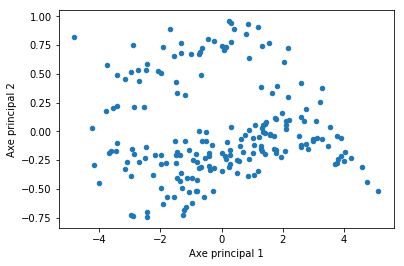

In [27]:
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'F']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['sex'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [39]:
def Visu2D (df, targets, colors, output_var):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    for target, color in zip(targets,colors):
        indicesToKeep = output_var == target
        ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
                   , finaldf.loc[indicesToKeep, 'Axe principal 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

In [40]:
targets = ['M', 'F']
colors = ['r', 'b']
output_var = data['sex']

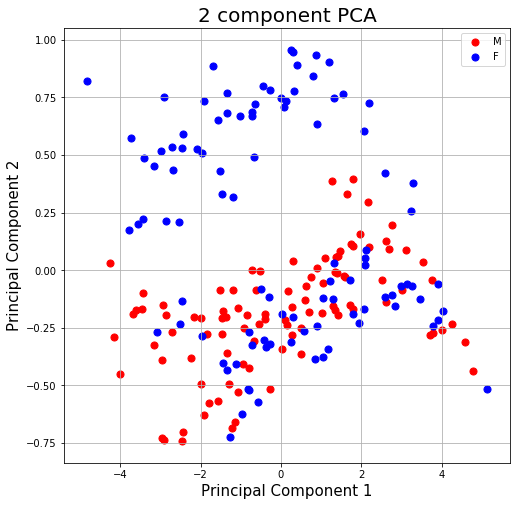

In [41]:
Visu2D(finaldf, targets, colors, output_var)

In [42]:
pca.explained_variance_ratio_

array([0.93505667, 0.03434814])